In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7575,Built-up Area,Ready To Move,Kallumantapa,2 BHK,SMncyy,1050,2.0,1.0,55.0
3834,Super built-up Area,19-Aug,Begur Road,3 BHK,Pruthg,1583,3.0,1.0,74.4
8674,Built-up Area,Ready To Move,Gulimangala,3 BHK,Daxir E,1640,3.0,2.0,70.0
1260,Built-up Area,Ready To Move,Vibuthipura,4 Bedroom,NaN,2150,4.0,1.0,80.0
3489,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,1575,5.0,1.0,158.0
11713,Super built-up Area,Ready To Move,Brookefield,3 BHK,NaN,1589,3.0,2.0,74.0
1435,Super built-up Area,18-Jan,KR Puram,3 BHK,NaN,1455,3.0,2.0,46.0
5675,Super built-up Area,Ready To Move,R.T. Nagar,2 BHK,NaN,970,2.0,1.0,55.0
13305,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500,1.0,3.0,220.0
11282,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,Soweray,1751,3.0,2.0,115.0


In [4]:
area_type_count = df.groupby('area_type')['area_type'].agg('count')

In [5]:
area_type_count

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.shape

(13320, 9)

In [8]:
# Drop the nan value
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df['BHK'] = df['size'].apply(lambda x: int(x.split(" ")[0])) # Store bhk value properly.

In [12]:
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
9818,Super built-up Area,Ready To Move,Seegehalli,3 BHK,Niowshi,1683,3.0,3.0,80.00,3
4567,Plot Area,Ready To Move,Seegehalli,3 Bedroom,Chorda,4000,3.0,1.0,235.00,3
9872,Super built-up Area,Ready To Move,Sahakara Nagar,2 BHK,NCensun,1180,2.0,2.0,72.00,2
666,Super built-up Area,Ready To Move,Shanthala Nagar,2 BHK,Malex C,1630,2.0,2.0,200.00,2
6737,Super built-up Area,18-Apr,Electronic City Phase II,2 BHK,Sryalan,1140,2.0,1.0,33.84,2
9866,Super built-up Area,Ready To Move,Brookefield,3 BHK,Vaontos,1750,2.0,2.0,75.00,3
1193,Built-up Area,Ready To Move,Banashankari,3 BHK,Skave E,1300,2.0,2.0,75.00,3
4770,Built-up Area,Ready To Move,Sarjapur Road,2 BHK,Amionce,1043,2.0,1.0,39.50,2
12879,Built-up Area,Ready To Move,Bannerghatta Road,2 BHK,Malmser,1206,2.0,3.0,53.00,2
1990,Built-up Area,Ready To Move,Jalahalli,2 BHK,Prensin,1400,1.0,1.0,80.00,2


In [13]:
df.drop('availability', axis=1, inplace=True)

In [14]:
df.sample(10)

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK
7834,Super built-up Area,Whitefield,2 BHK,Veales,1295,2.0,3.0,78.50,2
181,Super built-up Area,Hebbal Kempapura,3 BHK,Goateds,1700,3.0,2.0,155.00,3
3987,Built-up Area,Electronic City Phase II,3 BHK,Sryalan,1220,3.0,1.0,35.23,3
11405,Built-up Area,Bhoganhalli,2 BHK,Suwerlo,970,2.0,1.0,52.50,2
4615,Super built-up Area,Yelahanka,2 BHK,Niareum,1326,2.0,2.0,57.00,2
8808,Built-up Area,Bhoganhalli,2 BHK,Tenceen,1125,2.0,1.0,54.00,2
11699,Super built-up Area,Neeladri Nagar,2 BHK,SKisyDa,1105,2.0,2.0,30.00,2
1172,Super built-up Area,Akshaya Nagar,3 BHK,DLhtsnd,1897,3.0,2.0,120.00,3
4117,Super built-up Area,B Channasandra,2 BHK,PrncyRe,1080,2.0,1.0,45.00,2
8246,Super built-up Area,Ramagondanahalli,2 BHK,ViistLa,1151,2.0,2.0,43.60,2


In [15]:
def is_float(data):
    try:
        float(data)
    except:
        return False
    return True

In [16]:
df[~df['total_sqft'].apply(is_float)].sample(10)

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK
2881,Built-up Area,Volagerekallahalli,2 BHK,PSterAs,117Sq. Yards,2.0,2.0,38.000,2
10439,Super built-up Area,ITPL,2 BHK,Samukja,854 - 960,2.0,0.0,55.430,2
3364,Super built-up Area,Whitefield,1 BHK,Goted U,613 - 648,1.0,0.0,32.790,1
9736,Super built-up Area,Pragathi Nagar,1 BHK,Asarkia,799 - 803,1.0,0.0,33.645,1
6587,Super built-up Area,Kadugodi,1 BHK,RatatHa,840 - 1010,1.0,0.0,40.700,1
5179,Super built-up Area,Rachenahalli,1 BHK,AsNowre,660 - 700,1.0,0.0,32.640,1
122,Super built-up Area,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
1643,Super built-up Area,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,120.000,3
9149,Super built-up Area,Hosur Road,4 BHK,Saageat,2800 - 2870,4.0,0.0,241.000,4
12334,Super built-up Area,Budigere,1 BHK,Brstaue,650 - 760,1.0,0.0,34.545,1


In [17]:
def convert_sqft_to_no(data):
    tokens = data.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2

    try:
        return float(data)
    except:
        return None

In [18]:
df2 = df.copy()

In [19]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_no)

In [20]:
df2.head(10)

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4
12,Super built-up Area,7th Phase JP Nagar,2 BHK,Shncyes,1000.0,2.0,1.0,38.00,2
14,Plot Area,Sarjapur,3 Bedroom,Skityer,2250.0,3.0,2.0,148.00,3
15,Super built-up Area,Mysore Road,2 BHK,PrntaEn,1175.0,2.0,2.0,73.50,2
16,Super built-up Area,Bisuvanahalli,3 BHK,Prityel,1180.0,3.0,2.0,48.00,3
17,Super built-up Area,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1540.0,3.0,3.0,60.00,3


In [21]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']

In [22]:
df3.sample(10)

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
11886,Super built-up Area,Hebbal,4 BHK,Prersis,2375.0,4.0,2.0,189.00,4,7957.894737
5622,Built-up Area,Kengeri Satellite Town,2 BHK,Mameser,560.0,2.0,1.0,16.60,2,2964.285714
4574,Super built-up Area,Hoodi,1 BHK,GoAirej,706.0,1.0,1.0,48.24,1,6832.861190
880,Built-up Area,Uttarahalli,3 BHK,Laihai,1540.0,2.0,0.0,40.00,3,2597.402597
9698,Super built-up Area,Sarjapur Road,3 BHK,Adeatlm,2275.0,4.0,2.0,185.00,3,8131.868132
6359,Super built-up Area,Whitefield,4 BHK,Prtates,2882.0,5.0,1.0,158.00,4,5482.303956
8790,Super built-up Area,Doddabommasandra,2 BHK,Apion M,1300.0,2.0,3.0,32.00,2,2461.538462
10603,Built-up Area,Kalyan nagar,2 BHK,Satle C,1100.0,2.0,1.0,70.00,2,6363.636364
4436,Super built-up Area,Dasanapura,1 BHK,Tavenew,708.0,1.0,0.0,28.32,1,4000.000000
4888,Super built-up Area,Sarjapur Road,2 BHK,Frhtsr,1190.0,2.0,1.0,50.00,2,4201.680672


In [23]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stat = df3.groupby("location")['location'].agg("count").sort_values(ascending=False)
location_stat

location
Whitefield                        383
Sarjapur  Road                    297
Electronic City                   231
Thanisandra                       210
Kanakpura Road                    195
                                 ... 
2nd Block Jayanagar                 1
2nd Block Hrbr Layout               1
1st Block Jayanagar                 1
1 Giri Nagar                        1
Yeshwanthpur Industrial Suburb      1
Name: location, Length: 626, dtype: int64

In [24]:
location_state_less_than_10 = location_stat[location_stat<=10]
location_state_less_than_10

location
Vidyaranyapura                    10
Prithvi Layout                    10
Pattandur Agrahara                10
Dairy Circle                      10
Marsur                            10
                                  ..
2nd Block Jayanagar                1
2nd Block Hrbr Layout              1
1st Block Jayanagar                1
1 Giri Nagar                       1
Yeshwanthpur Industrial Suburb     1
Name: location, Length: 487, dtype: int64

In [25]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_state_less_than_10 else x)
len(df3.location.unique())

140

# Outliers Detection & Remove them

In [26]:
df3[df3.total_sqft/df3.BHK<300].head()

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
349,Plot Area,other,3 Bedroom,PrhyaK,11.0,3.0,2.0,74.0,3,672727.272727
480,Built-up Area,other,4 BHK,LiaveEn,1150.0,4.0,2.0,260.0,4,22608.695652
483,Plot Area,other,5 Bedroom,Bemesrm,1200.0,5.0,2.0,190.0,5,15833.333333
1239,Built-up Area,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,16.0,2,2909.090909
2040,Super built-up Area,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,15.0,2,2727.272727


In [27]:
df4 = df3[~(df3.total_sqft/df3.BHK<300)]
df4

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605
...,...,...,...,...,...,...,...,...,...,...
13308,Built-up Area,Bannerghatta Road,3 BHK,Baanise,1527.0,3.0,1.0,142.00,3,9299.279633
13314,Super built-up Area,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2,5258.545136


In [28]:
df3.shape

(7144, 10)

In [29]:
def remove_outliers(data):
    df_out = pd.DataFrame()
    for key,subdf in data.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
        
    return df_out
        

In [30]:
df5 = remove_outliers(df4)

In [31]:
df5.shape

(5522, 10)

In [32]:

def draw_scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK', s = 50)
    plt.xlabel('Total squre fit area')
    plt.ylabel('Price per square fit')
    plt.title(location)
    plt.legend()

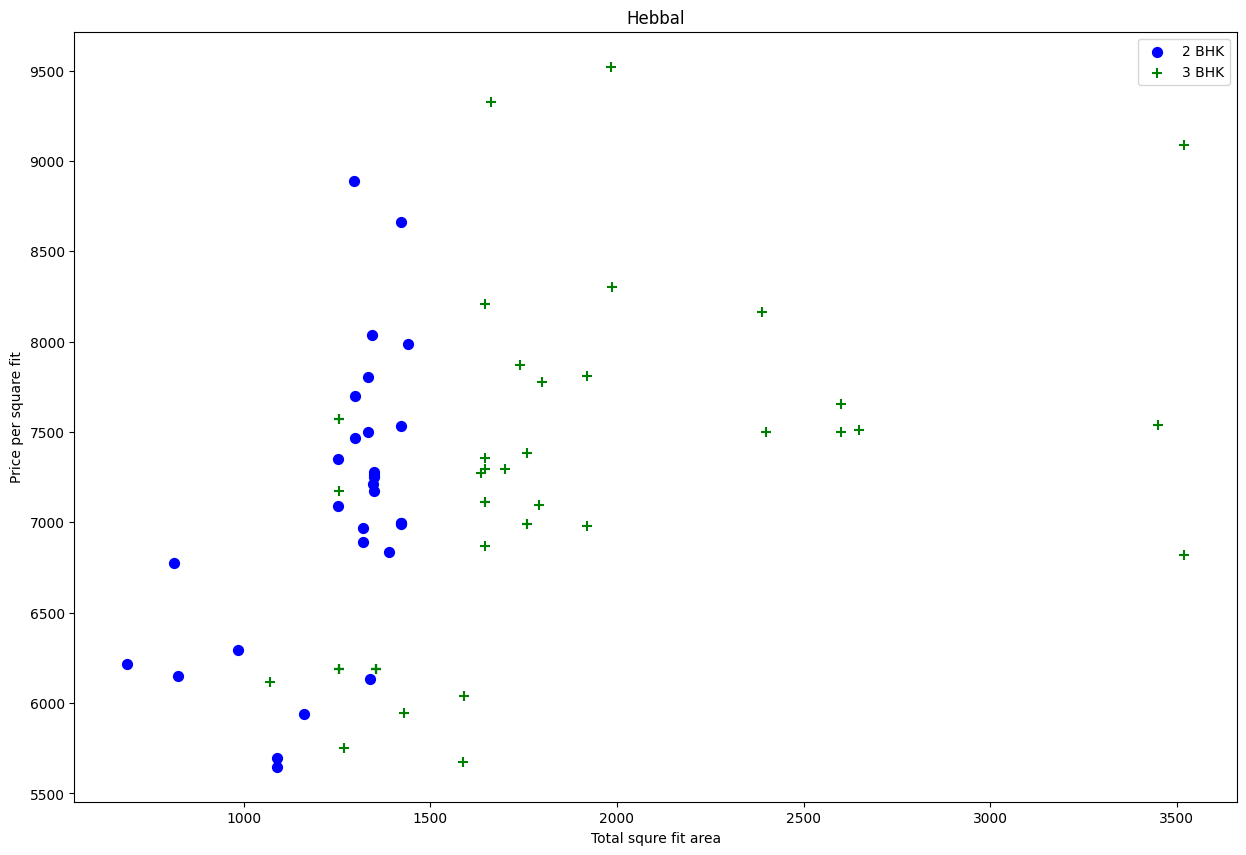

In [33]:
draw_scatter_plot(df5,'Hebbal')

### We should also remove properties where for same location, the price of(for example) 3 beadroom is less than 2 beadroom aparment(with same sqft area). Now we will bild static dicionary for per bhk
{
    1: {Mean:4000,
        std:1000,
        count: 3}
}
### Now we can remove those 3 BHK aparment whose price_per_sqft is less than mean price_per_sqft of 1 BHK aparment
    

In [34]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location,location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std":np.std(bhk_df.price_per_sqft),
                "count":bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices, axis='index', errors='ignore')


In [35]:
df6 = remove_bhk_outliers(df5)
df6

,area_type,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522
1,Super built-up Area,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667
2,Super built-up Area,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,2,7173.601148
3,Super built-up Area,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,2,8635.097493
4,Super built-up Area,1st Phase JP Nagar,3 BHK,Inntsth,1590.0,3.0,3.0,131.0,3,8238.993711
...,...,...,...,...,...,...,...,...,...,...
5512,Super built-up Area,other,3 BHK,Ablmsol,1500.0,2.0,3.0,78.0,3,5200.000000
5514,Super built-up Area,other,2 BHK,MJarlPe,1155.0,2.0,1.0,64.0,2,5541.125541
5515,Super built-up Area,other,3 BHK,Sariana,1508.0,3.0,1.0,77.0,3,5106.100796
5517,Super built-up Area,other,2 BHK,Maa 5a,1095.0,2.0,1.0,57.0,2,5205.479452


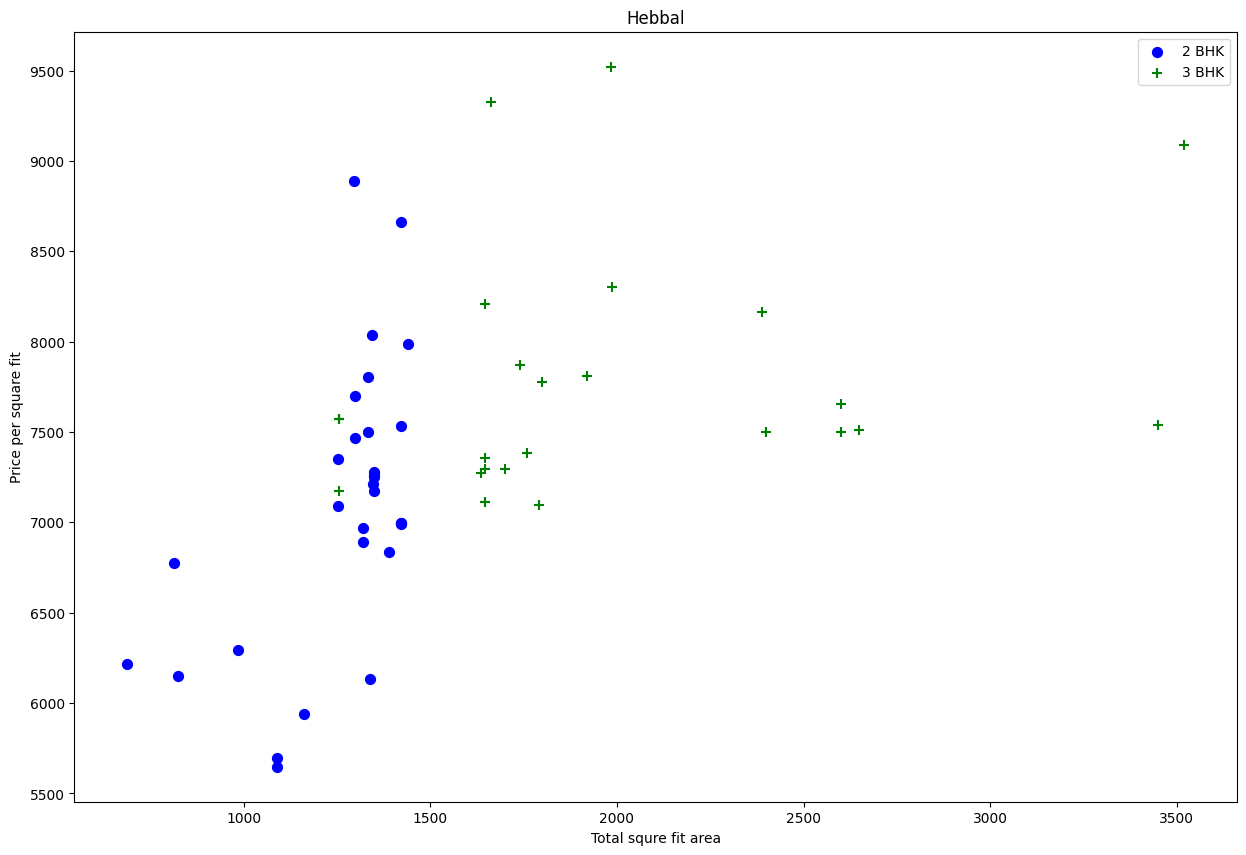

In [36]:
draw_scatter_plot(df6,'Hebbal')

Text(0, 0.5, 'Count')

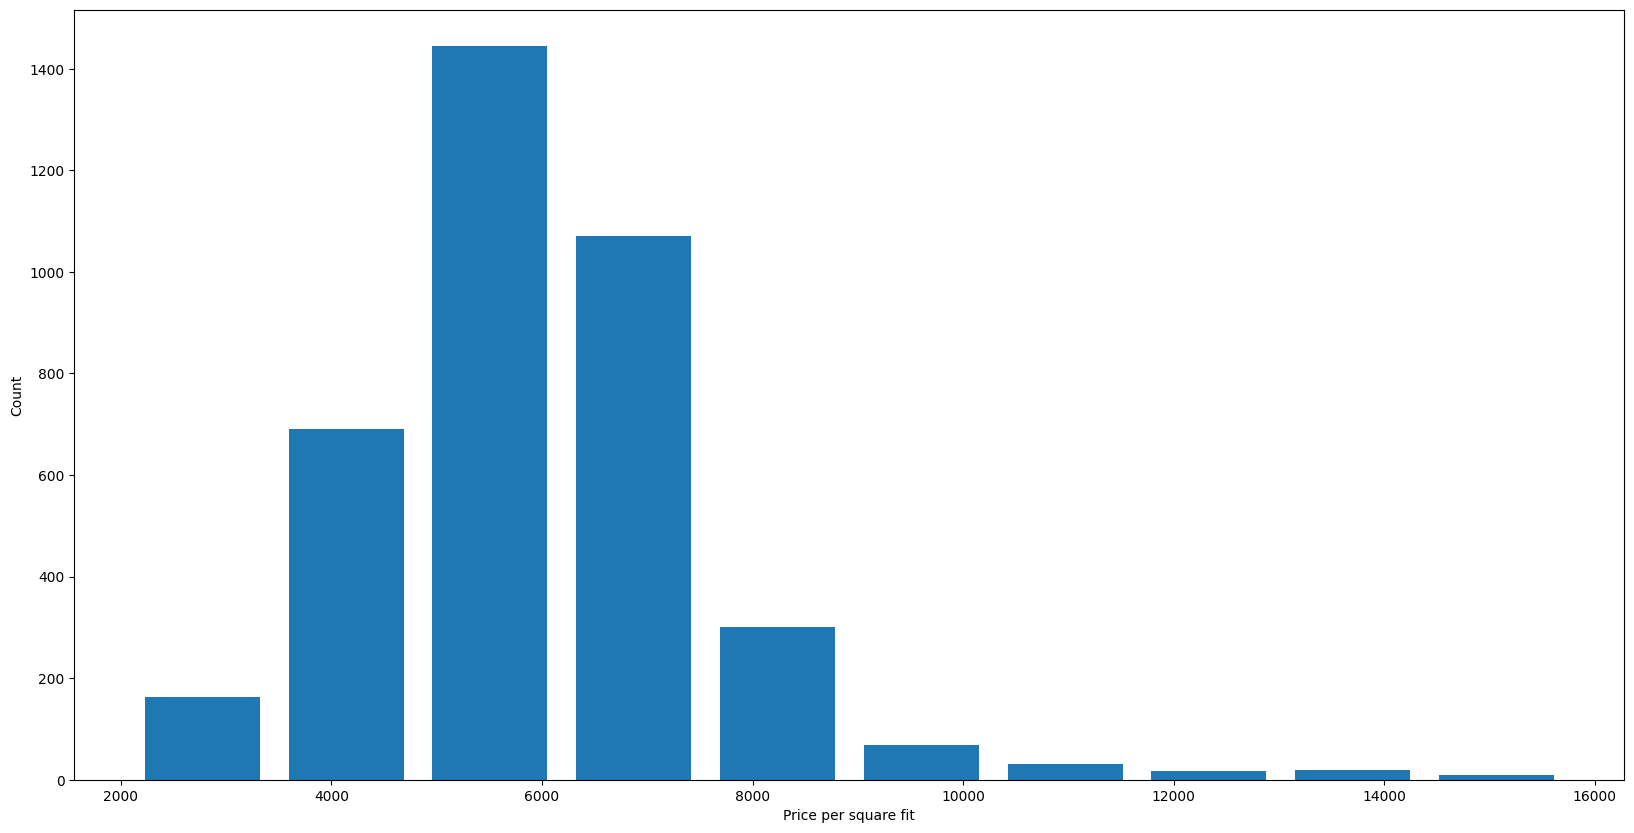

In [37]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per square fit")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

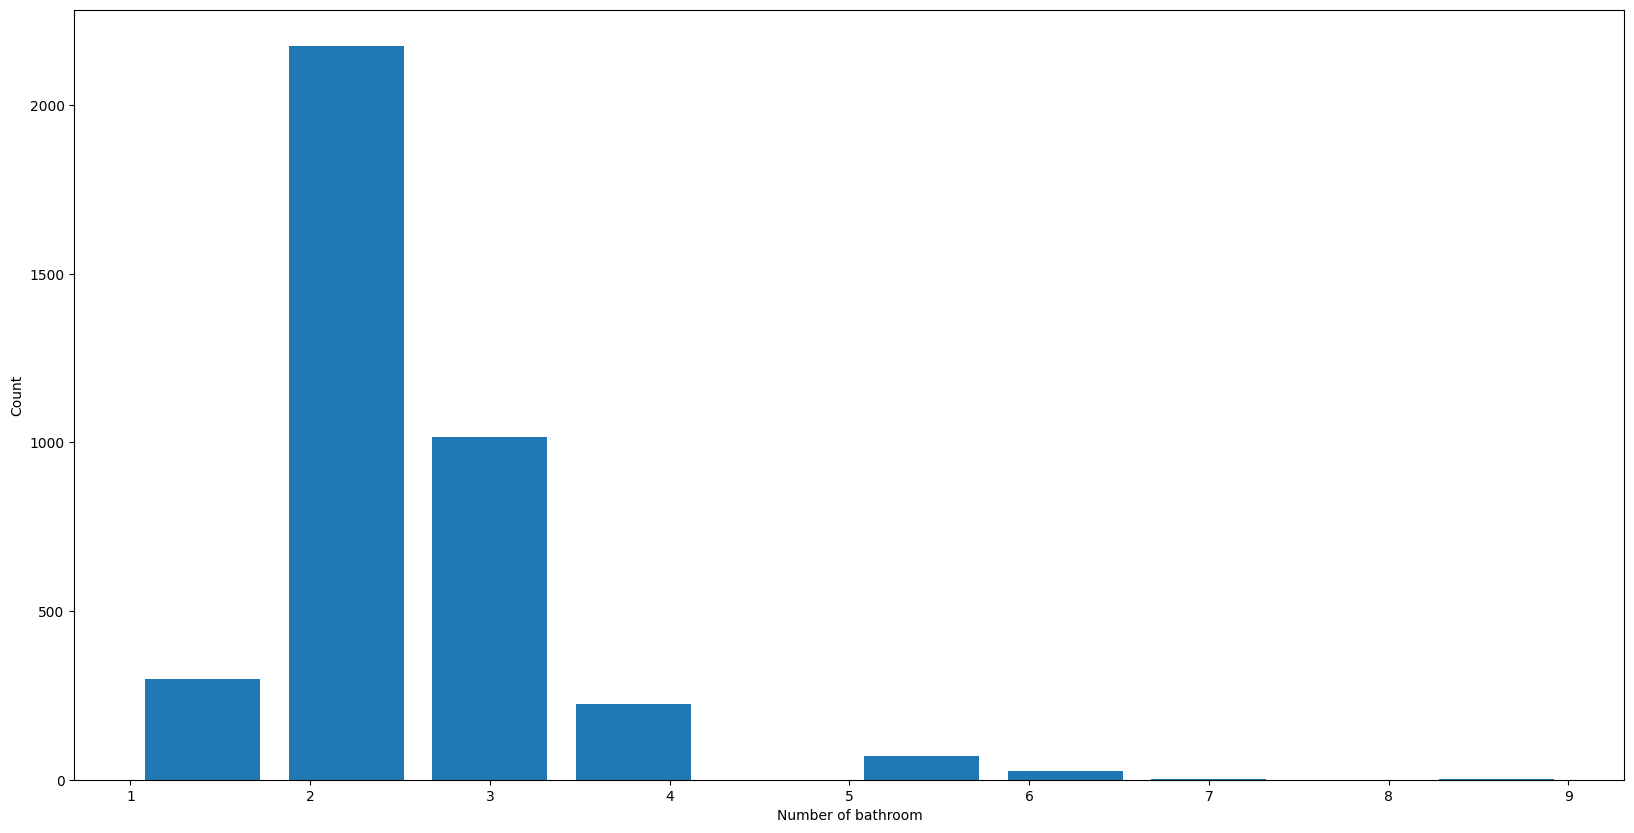

In [38]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("Count")

In [39]:
df7 = df6[df6.bath<df6.bath+2]
df7.shape

(3813, 10)

In [40]:
df8 = df7[['location','total_sqft','bath','price','BHK']]

In [41]:
df8.sample(10)

,location,total_sqft,bath,price,BHK
51,7th Phase JP Nagar,1000.0,2.0,70.65,2
3208,Sarjapur Road,984.0,2.0,59.00,2
1331,HSR Layout,1142.0,2.0,65.00,2
2395,Kenchenahalli,1015.0,2.0,58.00,2
3677,Vijayanagar,606.0,1.0,40.00,1
3929,Whitefield,1704.0,3.0,120.00,3
4528,other,11338.0,9.0,1000.00,6
3659,Varthur,1615.0,3.0,69.43,3
3605,Uttarahalli,1075.0,2.0,46.76,2
187,Ambedkar Nagar,2395.0,4.0,150.00,3


In [42]:
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9.sample(10)

,location,total_sqft,bath,price,BHK,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
2543,Kundalahalli,1047.0,2.0,82.62,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2812,Panathur,1438.0,2.0,100.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
785,Channasandra,1093.0,2.0,34.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3076,Sarjapur Road,1278.0,2.0,95.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
300,Banashankari,1310.0,2.0,80.43,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1380,Haralur Road,1225.0,2.0,69.84,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5429,other,1515.0,3.0,80.50,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4910,other,1713.0,3.0,125.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3780,Whitefield,2268.0,3.0,146.00,4,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2720,Mysore Road,1175.0,2.0,70.50,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df9.drop('location',axis=1)

,total_sqft,bath,price,BHK,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1875.0,3.0,167.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1394.0,2.0,100.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1077.0,2.0,93.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1590.0,3.0,131.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1500.0,2.0,78.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5514,1155.0,2.0,64.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5515,1508.0,3.0,77.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5517,1095.0,2.0,57.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df9.replace({False: 0, True: 1}, inplace=True)

D:\temp\ipykernel_9700\4122816970.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df9.replace({False: 0, True: 1}, inplace=True)


In [46]:
df9.head(10)

,location,total_sqft,bath,price,BHK,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,1077.0,2.0,93.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,1590.0,3.0,131.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2180.0,3.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,2077.0,3.0,175.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Phase JP Nagar,1205.0,2.0,85.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,2615.0,5.0,222.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5th Phase JP Nagar,1150.0,3.0,52.5,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x = df9.drop(['price', 'location'], axis='columns')
y = df9['price']
y

0       250.0
1       167.0
2       100.0
3        93.0
4       131.0
        ...  
5512     78.0
5514     64.0
5515     77.0
5517     57.0
5519     65.0
Name: price, Length: 3813, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9441381589027026

In [50]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv = cv)

array([0.93710246, 0.93254924, 0.93170593, 0.90542461, 0.92548215])

In [51]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # No params needed after removing 'normalize'
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        if config['params']:  # Ensure params exist before running GridSearchCV
            gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
            gs.fit(X, y)
            scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function
find_best_model_using_gridsearchcv(x, y)


,model,best_score,best_params
0,lasso,0.837984,"{'alpha': 1, 'selection': 'random'}"
1,decision_tree,0.863428,"{'criterion': 'squared_error', 'splitter': 'be..."


In [52]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return model.predict([X])[0] 

In [53]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\shtryash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(92.88161748771644)

In [54]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


C:\Users\shtryash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(92.88161748771644)

In [55]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\shtryash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(98.98370420089334)

In [56]:
predict_price('Indira Nagar',1000, 3, 3)


C:\Users\shtryash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(98.85838391208257)

# Export the tested model to a pickle file

In [57]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [58]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))